['4mct', 'uooq1p', '0dfiq', '3gupyg']
['hsxq9', 'bw352', 'nv6vh', 'z854p']


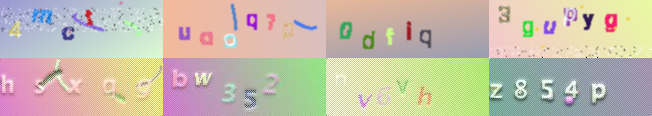

In [13]:
"""
评估生成的图片和真实图片的相似度
"""

from __future__ import annotations
import os
from PIL.Image import open  # type: ignore
from IPython.display import display
from PIL.Image import new as createImage
import random

# fmt: off
import sys
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).resolve().parent))
from new_captcha import NewImageCaptcha
# fmt: on


def generate_captcha(count, width=163, height=58):
    img_list = []
    chars_list = []
    # 生成验证码图片
    captcha = NewImageCaptcha(width=width, height=height,
                              fonts=[
                                  '../fonts/Roboto/Roboto-Thin.ttf',
                                  '../fonts/Roboto/Roboto-Light.ttf',
                                  '../fonts/Roboto/Roboto-Italic.ttf',
                                  '../fonts/Roboto/Roboto-Medium.ttf',
                              ],
                              font_sizes=(22, 24))

    for i in range(count):
        # k 表示验证码位数
        chars = ''.join(map(str, random.choices(
            '0123456789abcdefghijklmnopqrstuvwxyz', k=random.choice(range(4, 7)))))
        img = captcha.generate_image(chars)
        img_list.append(img)
        chars_list.append(chars)
    return img_list, chars_list


def get_img_path_list(img_dir, limit):
    img_path_list = []
    for root, dirs, files in os.walk(img_dir):
        for file in files:
            file_extension = os.path.splitext(file)[1]
            if file_extension in ['.jpg', '.jpeg', '.png']:
                img_path_list.append(os.path.join(root, file))

    return random.choices(img_path_list, k=limit)


def read_img(img_path):
    img = open(img_path)
    return img


count = 4
real_img_path_list = get_img_path_list(
    '../data/train-3363-stable-new/test', count)

generate_img_list, chars_list = generate_captcha(count)
real_img_list = [
    read_img(img_path) for img_path in real_img_path_list
]

width, height = generate_img_list[0].size
# 生成图片
generate_img = createImage('RGB', (width * count, height * 2))
for i in range(count):
    generate_img.paste(generate_img_list[i], (width * i, 0))
    generate_img.paste(real_img_list[i], (width * i, height))

print(chars_list)
print([
    os.path.basename(img_path).split('_')[0] for img_path in real_img_path_list
])
# generate_img.show()
display(generate_img)